
<div style="background-color:#2F4FDC; padding:25px; border-radius:12px; text-align:center; color:white;">
    <h1 style="margin:0;">📊 Marketing Campaign Performance Analysis 2025</h1>
    <h3 style="margin:5px 0 0 0;">Data Analyst: <b>Zainab Al-harbi</b></h3>
</div>



# 📓 Notebook Overview

### **Purpose**
This dataset includes **500 campaign** entries derived from 19 distinct campaigns, tracked across different quarters and marketing channels.

---

### **Dataset Summary**
- **Total Campaigns:** 500  
- **Time Period:** Q1–Q4 2025  
- **Cities Covered:** Jeddah, Riyadh, Mecca, Medina, Dammam  
- **Channels:** Snapchat, Instagram, TikTok, Twitter  
- **Total Investment:** 12.3M SAR  
- **Total Revenue:** 69.6M SAR  

---

### **Analysis Approach**
1. **Descriptive KPI Development & Analysis:** Build, calculate, and interpret key performance indicators (ROI, CPA, CVR, CTR). 
2. **Comparative Analysis:** Compare performance across cities, channels, and quarters  
3. **Trend Analysis:** Identify seasonal and temporal patterns  
4. **Segmentation:** Analyze by demographics (age, gender)  
5. **Visualization:** Create charts and graphs for insights  

---

### **Tools & Libraries**
- Python 3.x  
- Pandas for data manipulation  
- Matplotlib & Seaborn for visualization  
- NumPy for numerical operations  

---

### **Output**
A comprehensive analytical report with deep insights into **campaign performance**.


<div style="background-color:#DFF6E0; border-left:10px solid #4CAF50; padding:15px; border-radius:10px; font-size:28px; font-weight:bold; display:flex; align-items:center;">
  <div style="background-color:#4CAF50; color:white; border-radius:6px; width:40px; height:40px; display:flex; align-items:center; justify-content:center; margin-right:10px;">
    1
  </div>
  Data Preparation & Initial Exploration
</div>


In [1]:
# Import and Setup
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Visualization settings
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['figure.figsize'] = (14, 8)
sns.set_style("whitegrid")


In [2]:
# Load and Preview Data
df = pd.read_excel(r"C:\Users\hp\Desktop\اعمال تحليل\Marketing_Campaign_Results.xlsx")

print(f"✅ Data loaded successfully: {len(df)} campaigns")
print(f"📅 Time Period: Q1–Q4 2025")
print(f"🏙 Number of Cities: {df['City'].nunique()}")
print(f"📱 Number of Channels: {df['Channel'].nunique()}")

print("=" * 80)
print("Shape:", df.shape)
print("Columns:", list(df.columns))
df.head()


✅ Data loaded successfully: 500 campaigns
📅 Time Period: Q1–Q4 2025
🏙 Number of Cities: 5
📱 Number of Channels: 4
Shape: (500, 14)
Columns: ['Campaign Name', 'Campaign_ID', 'Channel', 'City', 'Age_Segment', 'Gender', 'Device', 'Impressions', 'Clicks', 'Conversions', 'Spend', 'Revenue', 'Conversion_Rate', 'Quarter']


,Campaign Name,Campaign_ID,Channel,City,Age_Segment,Gender,Device,Impressions,Clicks,Conversions,Spend,Revenue,Conversion_Rate,Quarter
0,عودة للعمل,1,Snapchat,Medina,35-44,Male,Mobile,171958,6201,341,22404,59796.664253,0.114161,Q1
1,حملة رمضان الكبرى,2,TikTok,Medina,45+,Female,Desktop,196867,8020,503,43861,14122.533105,0.045912,Q2
2,التوعية بالعلامة,3,Instagram,Riyadh,18-24,Female,Mobile,181932,6646,573,35040,59324.181008,0.077544,Q3
3,عروض الشتاء,4,Snapchat,Dammam,35-44,Male,Tablet,415838,19360,1541,27036,10041.302679,0.019011,Q4
4,انطلاقة الموسم,5,Snapchat,Jeddah,18-24,Female,Desktop,309178,10954,603,19664,8339.875387,0.018263,Q1


In [3]:
print("📊 Dataset Information:")
print(df.info())
print("=" * 90)
# Check for missing values in each column
print("🔍 Missing values per column:\n", df.isnull().sum())
print("=" * 90)

C = ["Impressions", "Clicks", "Conversions", "Spend", "Revenue"]
zero_check = (df[C] == 0).any()
print("⚠️ Columns containing zero values:")
print(zero_check)
# Count the number of unique marketing campaigns in the dataset
count_campaigns = df["Campaign Name"].nunique()
print("=" * 90)
print("📢 Number of unique campaigns:", count_campaigns)


📊 Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Campaign Name    500 non-null    object 
 1   Campaign_ID      500 non-null    int64  
 2   Channel          500 non-null    object 
 3   City             500 non-null    object 
 4   Age_Segment      500 non-null    object 
 5   Gender           500 non-null    object 
 6   Device           500 non-null    object 
 7   Impressions      500 non-null    int64  
 8   Clicks           500 non-null    int64  
 9   Conversions      500 non-null    int64  
 10  Spend            500 non-null    int64  
 11  Revenue          500 non-null    float64
 12  Conversion_Rate  500 non-null    float64
 13  Quarter          500 non-null    object 
dtypes: float64(2), int64(5), object(7)
memory usage: 54.8+ KB
None
🔍 Missing values per column:
 Campaign Name      0
Campaign_ID      

In [4]:
# KPI Calculation CTR,CVR,CPA,ROI, CPC 
df["CTR"] = (df["Clicks"] / df["Impressions"]) 
df["CPC"] = ( df["Spend"] / df["Clicks"])
df["ROI"] = (((df["Revenue"] - df["Spend"]) / df["Spend"]) * 100)
df["CPA"] =  df["Spend"] / df["Conversions"]
df[["Impressions", "Clicks", "Spend", "Revenue", "CTR", "CPC", "ROI", "CPA","Conversion_Rate",]].head(10)


,Impressions,Clicks,Spend,Revenue,CTR,CPC,ROI,CPA,Conversion_Rate
0,171958,6201,22404,59796.664253,0.036061,3.612966,166.901733,65.700880,0.114161
1,196867,8020,43861,14122.533105,0.040738,5.468953,-67.801616,87.198807,0.045912
2,181932,6646,35040,59324.181008,0.036530,5.272344,69.304170,61.151832,0.077544
3,415838,19360,27036,10041.302679,0.046557,1.396488,-62.859511,17.544452,0.019011
4,309178,10954,19664,8339.875387,0.035429,1.795143,-57.588103,32.610282,0.018263
5,169879,8375,13496,21417.542349,0.049300,1.611463,58.695483,16.806974,0.037353
6,160268,6273,3371,208113.624299,0.039141,0.537382,6073.646523,6.008913,0.113691
7,257892,12079,46502,64100.449207,0.046837,3.849822,37.844500,75.367909,0.056911
8,104886,3554,23126,293119.633211,0.033884,6.507034,1167.489549,78.928328,0.094359
9,187337,7161,11021,132656.515343,0.038225,1.539031,1103.670405,17.383281,0.061507


In [5]:
# Ensure correct data types
df['Spend'] = pd.to_numeric(df['Spend'], errors='coerce')
df['Revenue'] = pd.to_numeric(df['Revenue'], errors='coerce')
df['Conversions'] = pd.to_numeric(df['Conversions'], errors='coerce')
df['ROI'] = pd.to_numeric(df['ROI'], errors='coerce')
df['CPA'] = pd.to_numeric(df['CPA'], errors='coerce')
df['CTR'] = pd.to_numeric(df['CTR'], errors='coerce')
df['Conversion_Rate'] = pd.to_numeric(df['Conversion_Rate'], errors='coerce')

# Remove rows with missing essential values
df = df.dropna(subset=['Spend', 'Revenue', 'Conversions'])

print(f"✅ Data cleaning completed. Clean records: {len(df)}")


✅ Data cleaning completed. Clean records: 500


<div style="background-color:#DFF6E0; border-left:10px solid #4CAF50; padding:15px; border-radius:10px; font-size:32px; font-weight:bold;">
2️⃣ Overall Marketing Performance Analysis
</div>


In [6]:
#📈 Section 1: Overall Campaign Performance
title = "Subsection 2.1 – Overall Campaign Performance"
border_color = "\033[94m"  # Light blue text color
reset = "\033[0m"

# Create the box with padding and width
print(border_color + "┏" + "━" * 72 + "┓")
print("┃" + f" {title:<70}" + "┃")
print("┗" + "━" * 72 + "┛" + reset)
print("This section analyzes total spend, revenue, ROI, and profit across all campaigns.")
print("=" * 80)

# Calculate overall metrics
Total_spend = df['Spend'].sum()
Total_revenue = df['Revenue'].sum()
Total_conversions = df['Conversions'].sum()
Total_clicks = df["Clicks"].sum()
Total_Impressions = df["Impressions"].sum()
OVERALL_ROI =  ((Total_revenue - Total_spend) / Total_spend * 100)
Overall_CPA = ( Total_spend / Total_conversions)
Overall_CTR = (( Total_clicks / Total_Impressions)*100)
Overall_CVR = ((Total_conversions / Total_clicks)*100)
Total_profit = Total_revenue - Total_spend

# Display summarized metrics
print(f"""
📊 Key Performance Indicators:
   💰 Total Spend:           {Total_spend:,.2f} SAR
   💵 Total Revenue:         {Total_revenue:,.2f} SAR
   🎯 Total Conversions:     {int(Total_conversions):,}
   💎 Total Profit:            {Total_profit:,.2f} SAR
   📈 OVERALL_ROI:           {OVERALL_ROI:.2f}%
   💳 Overall_CPA:           {Overall_CPA:.2f} SAR
   👆 Overall_CTR:           {Overall_CTR:.2f}%
   🎯 Overall_CVR:           {Overall_CVR:.2f}%
   
        

""")

# Create summary dataframe
overall_performance = pd.DataFrame({
    'Total_spend': [Total_spend],
    'Total_Revenue': [Total_revenue],
    'Total_Conversions': [Total_conversions],
    'Total_Profit': [Total_profit],
    'OVERALL_ROI': [OVERALL_ROI],
    'Overall_CPA': [Overall_CPA],
    'Overall_CTR': [Overall_CTR],
    'Overall_CVR': [Overall_CVR ]
})


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Subsection 2.1 – Overall Campaign Performance                         ┃
┗━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┛
This section analyzes total spend, revenue, ROI, and profit across all campaigns.

📊 Key Performance Indicators:
   💰 Total Spend:           12,319,715.00 SAR
   💵 Total Revenue:         69,674,970.73 SAR
   🎯 Total Conversions:     405,256
   💎 Total Profit:            57,355,255.73 SAR
   📈 OVERALL_ROI:           465.56%
   💳 Overall_CPA:           30.40 SAR
   👆 Overall_CTR:           3.99%
   🎯 Overall_CVR:           7.53%
   
        




In [7]:
#🌍 Section 2: City Performance Analysis
color = "\033[93m"  # Orange
reset = "\033[0m"
title = "Subsection 2.2 – City Performance Analysis"
print(color + "┏" + "━" * 72 + "┓")
print("┃" + f" {title:<70}" + "┃")
print("┗" + "━" * 72 + "┛" + reset)
print("=" * 80)
# Aggregate performance by city
city_analysis = df.groupby('City').agg({
    'Spend': 'sum',
    'Revenue': 'sum',
    'Conversions': 'sum',
    'Campaign_ID': 'count'
}).reset_index()

city_analysis['ROI'] = ((city_analysis['Revenue'] - city_analysis['Spend']) / city_analysis['Spend']) * 100
city_analysis['CPA'] = city_analysis['Spend'] / city_analysis['Conversions']

# Sort by ROI
city_analysis = city_analysis.sort_values('ROI', ascending=False)

# Display city ranking based on ROI
print("\n🏆 City Ranking by Average ROI:")
print(f"{'City':<15} {'Avg ROI%':<15} {'CPA (SAR)':<15} {'Revenue':<20} {'Spend':<20} {'Campaign Count':<15}")
print("-" * 85)

for _, row in city_analysis.iterrows():
    print(f"{row['City']:<15} {row['ROI']:<15.2f}{row['CPA']:<15.2f} {row['Revenue']:<20,.0f} {row['Spend']:<20,.0f} {int(row['Campaign_ID']):<15}")

# Top 3 campaigns per city
print("\n" + "-" * 80)
print("🌟 Top 3 Campaigns per City:")
print("-" * 80)

for city in city_analysis['City'].head(5):
    city_campaigns = df[df['City'] == city].nlargest(3, 'ROI')[
        ['Campaign Name', 'ROI', 'Channel', 'Conversions', 'Revenue']
    ]
    print(f"\n📍 {city}:")
    for idx, row in city_campaigns.iterrows():
        print(f"   • {row['Campaign Name']}")
        print(f"     ROI: {row['ROI']:.2f}% | Channel: {row['Channel']} | Conversions: {row['Conversions']} | Revenue: {row['Revenue']:,.0f} SAR")

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Subsection 2.2 – City Performance Analysis                            ┃
┗━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┛

🏆 City Ranking by Average ROI:
City            Avg ROI%        CPA (SAR)       Revenue              Spend                Campaign Count 
-------------------------------------------------------------------------------------
Medina          487.52         32.05           16,503,615           2,809,030            114            
Riyadh          480.66         28.65           13,392,308           2,306,405            99             
Makkah          476.32         27.94           12,478,739           2,165,238            91             
Jeddah          470.42         30.12           15,465,993           2,711,325            110            
Dammam          408.41         33.43           11,834,316           2,327,717            86             

--------------------------

In [8]:
#📱 Section 3: Channel Performance Analysis
color = "\033[95m"  # Purple
reset = "\033[0m"
title = "Subsection 2.3 – Channel Performance Analysis"
print(color + "┏" + "━" * 72 + "┓")
print("┃" + f" {title:<70}" + "┃")
print("┗" + "━" * 72 + "┛" + reset)
print("=" * 80)

# Aggregate actual (weighted) performance by channel
channel_analysis = df.groupby('Channel').agg({
    'Campaign_ID': 'count',
    'Spend': 'sum',
    'Revenue': 'sum',
    'Conversions': 'sum',
    'Clicks': 'sum',
    'Impressions': 'sum'
}).reset_index()

# Calculate actual metrics (not averages)
channel_analysis['ROI'] = ((channel_analysis['Revenue'] - channel_analysis['Spend']) / channel_analysis['Spend']) * 100
channel_analysis['CPA'] = channel_analysis['Spend'] / channel_analysis['Conversions']
channel_analysis['CTR'] = (channel_analysis['Clicks'] / channel_analysis['Impressions']) * 100
channel_analysis['CVR'] = (channel_analysis['Conversions'] / channel_analysis['Clicks']) * 100

# Sort by ROI
channel_analysis = channel_analysis.sort_values('ROI', ascending=False)

# Display ranking by performance
print("\n🏆 Channel Ranking by Performance:")
print(f"{'Channel':<15} {'Avg ROI%':<15} {'Avg CPA':<15} {'Avg CVR%':<15} {'Campaign Count':<15}")
print("-" * 75)

for _, row in channel_analysis.iterrows():
    cvr_display = row['CVR'] * 100 if not pd.isna(row['CVR']) else 0
    print(f"{row['Channel']:<15} {row['ROI']:<15.2f} {row['CPA']:<15.2f} {cvr_display:<15.2f} {int(row['Campaign_ID']):<15}")

# Top 3 campaigns per channel
print("\n" + "-" * 80)
print("🌟 Top 3 Campaigns per Channel:")
print("-" * 80)

for channel in channel_analysis['Channel']:
    channel_campaigns = df[df['Channel'] == channel].nlargest(3, 'ROI')[
        ['Campaign Name', 'ROI', 'City', 'Conversions']
    ]
    print(f"\n📱 {channel}:")
    for idx, row in channel_campaigns.iterrows():
        print(f"   • {row['Campaign Name']}: ROI {row['ROI']:.2f}% | City: {row['City']} | Conversions: {int(row['Conversions'])}")


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Subsection 2.3 – Channel Performance Analysis                         ┃
┗━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┛

🏆 Channel Ranking by Performance:
Channel         Avg ROI%        Avg CPA         Avg CVR%        Campaign Count 
---------------------------------------------------------------------------
Instagram       514.60          28.82           751.77          122            
Snapchat        470.02          30.79           745.39          122            
Twitter         462.24          31.30           747.33          108            
TikTok          426.34          30.74           763.30          148            

--------------------------------------------------------------------------------
🌟 Top 3 Campaigns per Channel:
--------------------------------------------------------------------------------

📱 Instagram:
   • حملة رمضان الكبرى: ROI 15320.91% | City: Medina | Co

In [9]:
#"📅 Section 4: Quarterly Performance Analysis
color = "\033[33m"  # Yellow
reset = "\033[0m"
title = "Subsection 2.4 – Quarterly Performance Analysis"
print(color + "┏" + "━" * 72 + "┓")
print("┃" + f" {title:<70}" + "┃")
print("┗" + "━" * 72 + "┛" + reset)
print("=" * 80)

# Aggregate performance by quarter
quarterly_analysis = df.groupby('Quarter').agg({
    'Spend': 'sum',
    'Revenue': 'sum',
    'Conversions': 'sum',
    'Campaign_ID': 'count'
}).reset_index()
quarterly_analysis['ROI']=((quarterly_analysis['Revenue']-quarterly_analysis['Spend'])/quarterly_analysis['Spend'])*100
quarterly_analysis = quarterly_analysis.sort_values('Quarter')

# Display overall performance by quarter
print("\n📊 Overall Performance per Quarter:")
print(f"{'Quarter':<10} {'Spend':<20} {'Revenue':<20} {'Avg ROI%':<15} {'Campaign Count':<15}")
print("-" * 80)
for _, row in quarterly_analysis.iterrows():
    print(f"{row['Quarter']:<10} {row['Spend']:<20,.0f} {row['Revenue']:<20,.0f} {row['ROI']:<15.2f} {int(row['Campaign_ID']):<15}")

# Best channel and city per quarter
print("\n" + "-" * 80)
print("🏆 Best Channel and City per Quarter:")
print("-" * 80)

for quarter in ['Q1', 'Q2', 'Q3', 'Q4']:
    quarter_data = df[df['Quarter'] == quarter]

    if len(quarter_data) > 0:
          
        top_channels = (
            quarter_data.groupby('Channel')
            .agg({'Spend': 'sum', 'Revenue': 'sum'})
            .reset_index()
        )
        top_channels['ROI'] = ((top_channels['Revenue'] - top_channels['Spend']) / top_channels['Spend']) * 100
        top_channels = top_channels.sort_values('ROI', ascending=False).head(2)

      
        city_analysis = quarter_data.groupby('City').agg({
            'Revenue': 'sum',
            'Spend': 'sum'
        }).reset_index()
        city_analysis['ROI'] = ((city_analysis['Revenue'] - city_analysis['Spend']) / city_analysis['Spend']) * 100
        best_city_row = city_analysis.loc[city_analysis['ROI'].idxmax()]
        best_city = best_city_row['City']
        best_city_ROI = best_city_row['ROI']

       
        best_campaign = quarter_data.loc[quarter_data['ROI'].idxmax()]

        print(f"\n🏆 {quarter}:")
        for idx, row in top_channels.iterrows():
            print(f" {idx+1}. {row['Channel']} | ROI = {row['ROI']:.2f}% | Revenue = {row['Revenue']:.0f} SAR | Spend = {row['Spend']:.0f} SAR")
        print(f" 🎯 Best Campaign: {best_campaign['Campaign Name']} | ROI = {best_campaign['ROI']:.2f}% | Revenue = {best_campaign['Revenue']:.0f} SAR | Spend = {best_campaign['Spend']:.0f} SAR")
        print(f" 🏙️ Best City: {best_city} (ROI {best_city_ROI:.2f}%)")


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Subsection 2.4 – Quarterly Performance Analysis                       ┃
┗━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┛

📊 Overall Performance per Quarter:
Quarter    Spend                Revenue              Avg ROI%        Campaign Count 
--------------------------------------------------------------------------------
Q1         3,195,745            17,248,104           439.72          125            
Q2         3,188,373            16,523,941           418.26          125            
Q3         2,894,057            18,018,391           522.60          125            
Q4         3,041,540            17,884,534           488.01          125            

--------------------------------------------------------------------------------
🏆 Best Channel and City per Quarter:
--------------------------------------------------------------------------------

🏆 Q1:
 4. Twitter | ROI = 566.65%

In [10]:
#👥 Section 5: Demographic Impact Analysis
color = "\033[37m"  # Light Gray
reset = "\033[0m"
title = "Subsection 2.5 – Demographic Impact Analysis"
print(color + "┏" + "━" * 72 + "┓")
print("┃" + f" {title:<70}" + "┃")
print("┗" + "━" * 72 + "┛" + reset)
print("=" * 80)

# A) Age Segment Analysis
print("\n📊 A) Age Segment Analysis:")
age_analysis = df.groupby('Age_Segment').agg({
    'Spend': 'sum',
    'Revenue': 'sum',
    'Conversions': 'sum',
    'Clicks': 'sum',
    'Campaign_ID': 'count'
}).reset_index()


age_analysis['ROI'] = ((age_analysis['Revenue'] / age_analysis['Spend']) - 1) * 100
age_analysis['CPA'] = age_analysis['Spend'] / age_analysis['Conversions']
age_analysis['CVR%'] = (age_analysis['Conversions'] / age_analysis['Clicks']) * 100

age_analysis = age_analysis.sort_values('ROI', ascending=False)

print(f"{'Age Segment':<15} {'Campaigns':<15} {'Avg CVR%':<15} {'Avg ROI%':<15} {'Avg CPA':<15}")
print("-" * 75)
for _, row in age_analysis.iterrows():
    print(f"{row['Age_Segment']:<15} {int(row['Campaign_ID']):<15} {row['CVR%']:<15.2f} {row['ROI']:<15.2f} {row['CPA']:<15.2f}")


# B) Gender Analysis
print("\n📊 B) Gender Analysis:")
gender_analysis = df.groupby('Gender').agg({
    'Spend': 'sum',
    'Revenue': 'sum',
    'Conversions': 'sum',
    'Clicks': 'sum',
    'Campaign_ID': 'count'
}).reset_index()

# --- حساب المؤشرات ---
gender_analysis['ROI'] = ((gender_analysis['Revenue'] / gender_analysis['Spend']) - 1) * 100
gender_analysis['CPA'] = gender_analysis['Spend'] / gender_analysis['Conversions']
gender_analysis['CVR%'] = (gender_analysis['Conversions'] / gender_analysis['Clicks']) * 100

# --- ترتيب حسب ROI ---
gender_analysis = gender_analysis.sort_values('ROI', ascending=False)

print(f"{'Gender':<15} {'Campaigns':<15} {'Avg CVR%':<15} {'Avg ROI%':<15} {'Avg CPA':<15}")
print("-" * 75)
for _, row in gender_analysis.iterrows():
    print(f"{row['Gender']:<15} {int(row['Campaign_ID']):<15} {row['CVR%']:<15.2f} {row['ROI']:<15.2f} {row['CPA']:<15.2f}")


# C) Device Type Analysis
print("\n📊 C) Device Type Analysis:")
device_analysis = df.groupby('Device').agg({
    'Spend': 'sum',
    'Revenue': 'sum',
    'Conversions': 'sum',
    'Clicks': 'sum',
    'Campaign_ID': 'count'
}).reset_index()


device_analysis['ROI'] = ((device_analysis['Revenue'] / device_analysis['Spend']) - 1) * 100
device_analysis['CPA'] = device_analysis['Spend'] / device_analysis['Conversions']
device_analysis['CVR%'] = (device_analysis['Conversions'] / device_analysis['Clicks']) * 100
device_analysis['Share%'] = (device_analysis['Campaign_ID'] / device_analysis['Campaign_ID'].sum()) * 100


device_analysis = device_analysis.sort_values('ROI', ascending=False)

print(f"{'Device':<15} {'Share%':<10} {'Avg CVR%':<15} {'Avg ROI%':<15} {'Avg CPA':<15}")
print("-" * 75)
for _, row in device_analysis.iterrows():
    print(f"{row['Device']:<15} {row['Share%']:<10.1f} {row['CVR%']:<15.2f} {row['ROI']:<15.2f} {row['CPA']:<15.2f}")


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Subsection 2.5 – Demographic Impact Analysis                          ┃
┗━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┛

📊 A) Age Segment Analysis:
Age Segment     Campaigns       Avg CVR%        Avg ROI%        Avg CPA        
---------------------------------------------------------------------------
45+             113             7.68            517.54          26.69          
25-34           125             7.25            480.34          33.36          
35-44           133             7.57            447.85          31.71          
18-24           129             7.59            425.91          30.03          

📊 B) Gender Analysis:
Gender          Campaigns       Avg CVR%        Avg ROI%        Avg CPA        
---------------------------------------------------------------------------
Male            261             7.48            491.26          28.91          
Female       

In [11]:
# 📊 Best Performing Age Segment and Gender Distribution

# --- Age Segment Analysis ---
age_analysis = df.groupby('Age_Segment').agg({
    'Spend': 'sum',
    'Revenue': 'sum',
    'Conversions': 'sum',
    'Campaign_ID': 'count'
}).reset_index()

# Calculate actual ROI and CPA
age_analysis['ROI'] = ((age_analysis['Revenue'] - age_analysis['Spend']) / age_analysis['Spend']) * 100
age_analysis['CPA'] = age_analysis['Spend'] / age_analysis['Conversions']

# Calculate each segment's share of total spend
total_spend = age_analysis['Spend'].sum()
age_analysis['Share_Pct'] = (age_analysis['Spend'] / total_spend) * 100

# Identify best-performing age segment
best_age_row = age_analysis.loc[age_analysis['ROI'].idxmax()]
best_age = best_age_row['Age_Segment']
best_age_share = best_age_row['Share_Pct']

print(f"📈 Best Age Segment: {best_age} | Share: {best_age_share:.2f}% of total campaigns")

# --- Gender Analysis ---
gender_analysis = df.groupby('Gender').agg({
    'Spend': 'sum',
    'Revenue': 'sum',
    'Conversions': 'sum',
    'Campaign_ID': 'count'
}).reset_index()

# Calculate ROI and CPA for gender
gender_analysis['ROI'] = ((gender_analysis['Revenue'] - gender_analysis['Spend']) / gender_analysis['Spend']) * 100
gender_analysis['CPA'] = gender_analysis['Spend'] / gender_analysis['Conversions']

# Calculate gender share of total spend
total_gender_spend = gender_analysis['Spend'].sum()
gender_analysis['Share_Pct'] = (gender_analysis['Spend'] / total_gender_spend) * 100

female_share = gender_analysis.loc[gender_analysis['Gender'] == 'Female', 'Share_Pct'].values[0]
male_share = gender_analysis.loc[gender_analysis['Gender'] == 'Male', 'Share_Pct'].values[0]

print(f"👩 Female Share: {female_share:.2f}% of total spend")
print(f"👨 Male Share: {male_share:.2f}% of total spend")


📈 Best Age Segment: 45+ | Share: 21.84% of total campaigns
👩 Female Share: 51.03% of total spend
👨 Male Share: 48.97% of total spend


In [12]:
#🏆 Section 6: Best and Worst Campaigns Analysi
color = "\033[33m"  # Gold / Yellow tone
reset = "\033[0m"
title = "Subsection 2.6 – Best and Worst Campaigns Analysis"
print(color + "┏" + "━" * 72 + "┓")
print("┃" + f" {title:<70}" + "┃")
print("┗" + "━" * 72 + "┛" + reset)
print("=" * 80)

# Top 5 Campaigns (Highest ROI)
print("\n🥇 Top 5 Campaigns (Highest ROI):")
print("-" * 80)

top5 = df.nlargest(5, 'ROI')[
    ['Campaign Name', 'ROI', 'Revenue', 'Spend', 'Channel', 'City', 'Quarter', 'Age_Segment']
]

for idx, (i, row) in enumerate(top5.iterrows(), 1):
    print(f"\n{idx}. {row['Campaign Name']}")
    print(f"   ROI: {row['ROI']:.2f}% | Revenue: {row['Revenue']:,.0f} SAR | Spend: {row['Spend']:,.0f} SAR")
    print(f"   Channel: {row['Channel']} | City: {row['City']} | Quarter: {row['Quarter']} | Segment: {row['Age_Segment']}")

# Bottom 5 Campaigns (Lowest ROI)
print("\n\n❌ Bottom 5 Campaigns (Lowest ROI):")
print("-" * 80)

bottom5 = df.nsmallest(5, 'ROI')[
    ['Campaign Name', 'ROI', 'Revenue', 'Spend', 'Channel', 'City', 'Quarter']
]

for idx, (i, row) in enumerate(bottom5.iterrows(), 1):
    print(f"\n{idx}. {row['Campaign Name']}")
    print(f"   ROI: {row['ROI']:.2f}% | Revenue: {row['Revenue']:,.0f} SAR | Spend: {row['Spend']:,.0f} SAR")
    print(f"   Channel: {row['Channel']} | City: {row['City']} | Quarter: {row['Quarter']}")


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Subsection 2.6 – Best and Worst Campaigns Analysis                    ┃
┗━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┛

🥇 Top 5 Campaigns (Highest ROI):
--------------------------------------------------------------------------------

1. حملة العيد
   ROI: 51274.95% | Revenue: 314,415 SAR | Spend: 612 SAR
   Channel: Snapchat | City: Jeddah | Quarter: Q2 | Segment: 25-34

2. التوعية بالعلامة
   ROI: 23874.16% | Revenue: 432,973 SAR | Spend: 1,806 SAR
   Channel: Snapchat | City: Riyadh | Quarter: Q3 | Segment: 45+

3. التوفير الذكي
   ROI: 21629.03% | Revenue: 146,454 SAR | Spend: 674 SAR
   Channel: Snapchat | City: Riyadh | Quarter: Q1 | Segment: 45+

4. تجربة المستخدم 2025
   ROI: 21559.64% | Revenue: 255,584 SAR | Spend: 1,180 SAR
   Channel: TikTok | City: Dammam | Quarter: Q4 | Segment: 45+

5. حملة رمضان الكبرى
   ROI: 15320.91% | Revenue: 137,092 SAR | Spend: 889 SAR
   Chan

<div style="background-color:#DFF6E0; border-left:10px solid #4CAF50; padding:15px; border-radius:10px; font-size:32px; font-weight:bold; display:flex; align-items:center;">
  <div style="background-color:#4CAF50; color:white; border-radius:6px; width:45px; height:45px; display:flex; align-items:center; justify-content:center; margin-right:12px; font-size:24px;">
    3
  </div>
  Data Visualization & Insights
</div>


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Subsection 3.1 – City Performance Visualization                       ┃
┗━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┛
📊 Visualization: Average ROI and Revenue by City


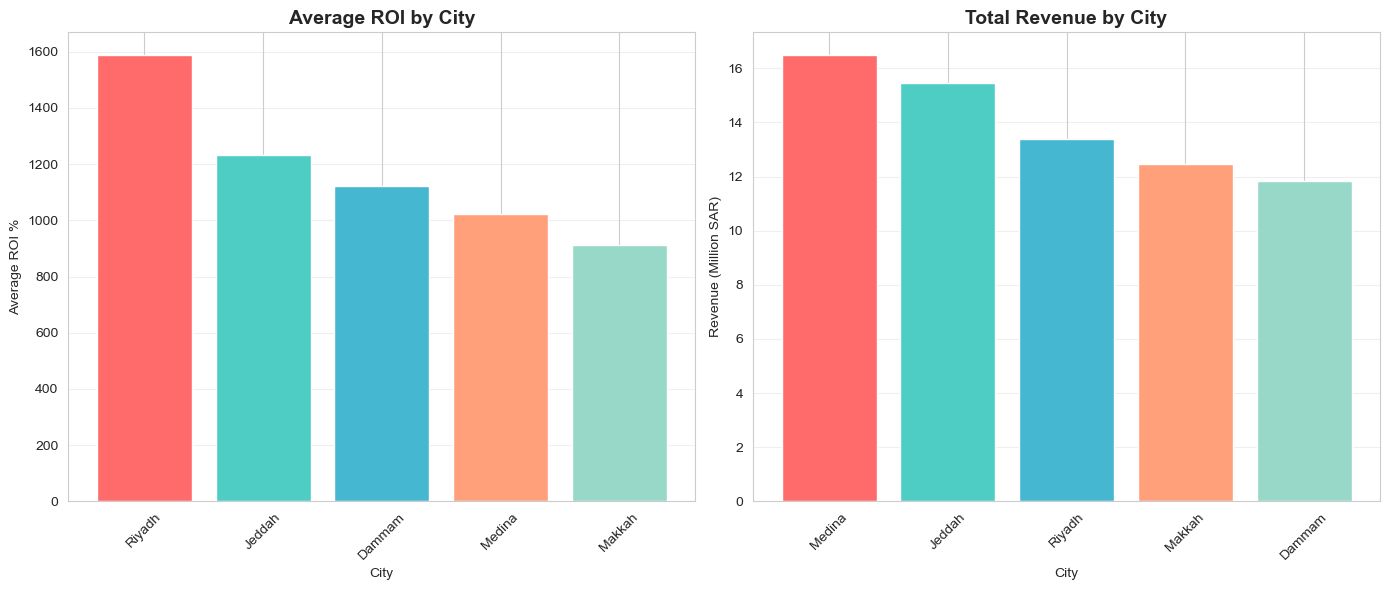

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Subsection 3.2 – Channel Performance Visualization                    ┃
┗━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┛
📊 Visualization: ROI and Campaign Distribution by Channel


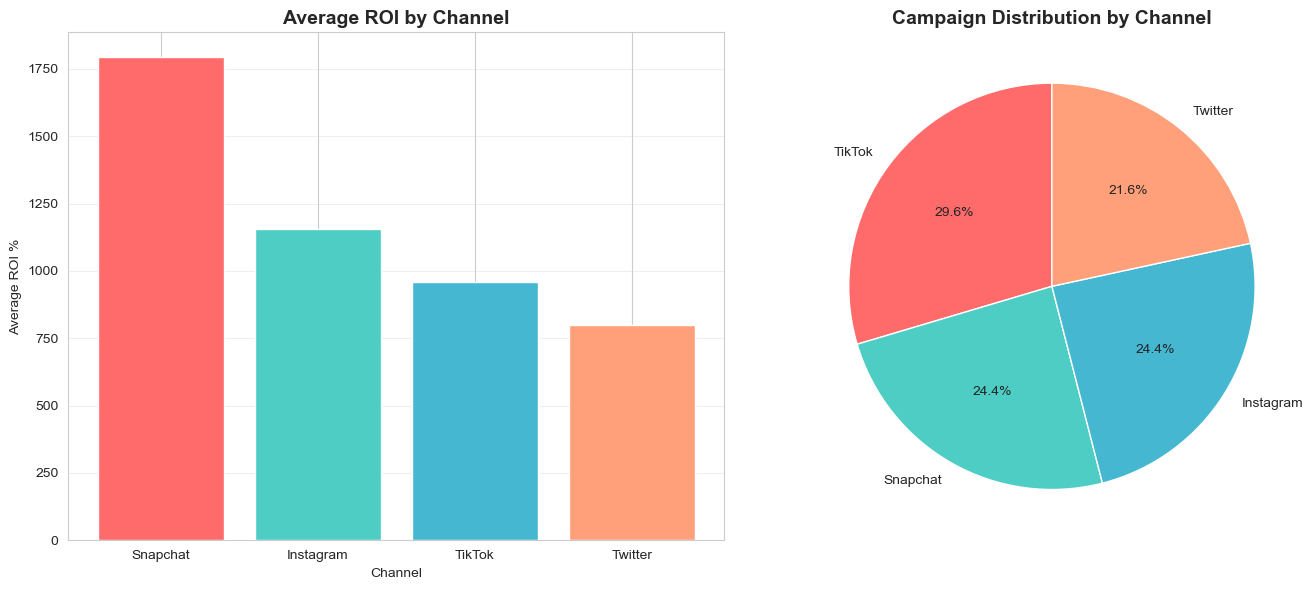

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Subsection 3.3 – Quarterly Trends Visualization                       ┃
┗━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┛
📈 Visualization: ROI and Revenue Trends Across Quarters


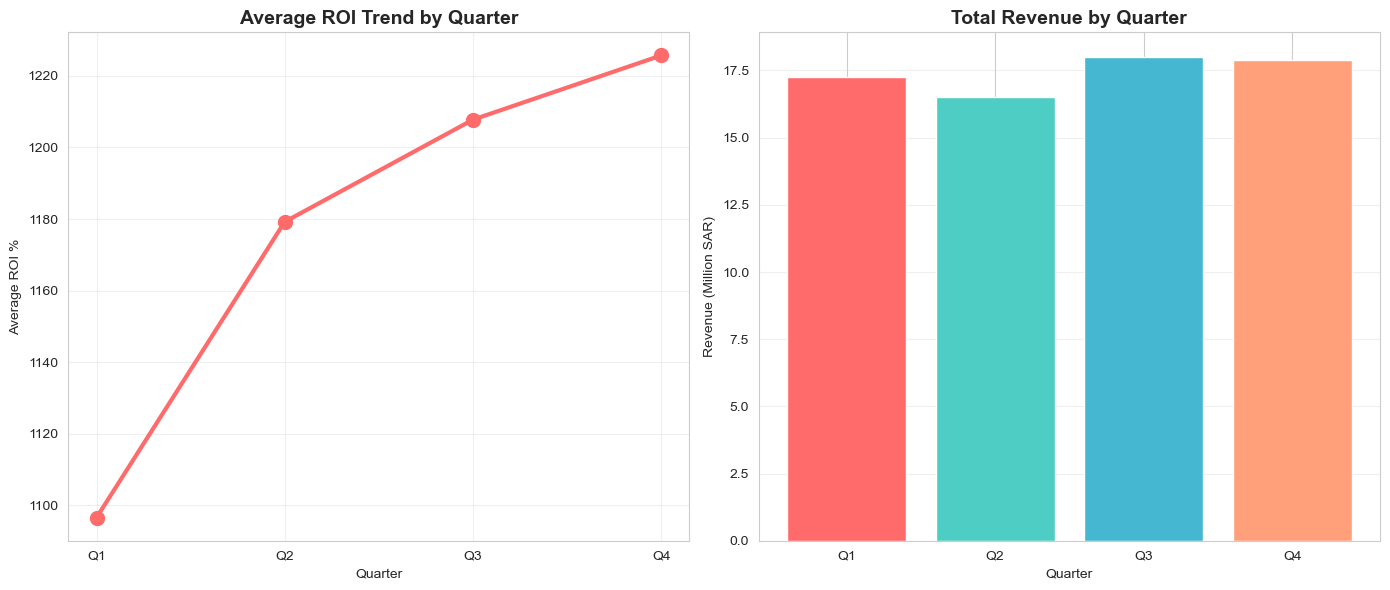

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Subsection 3.4 – Demographics Visualization                           ┃
┗━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┛
👥 Visualization: ROI & Conversion Rate by Age, Gender, Device


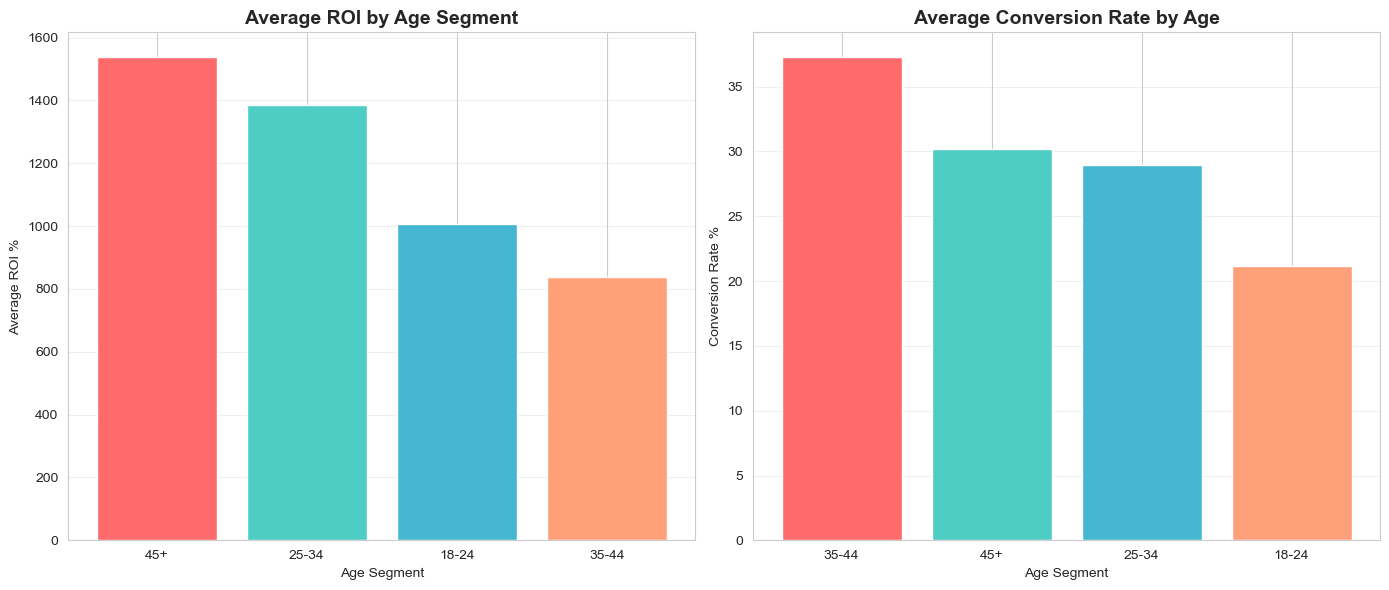

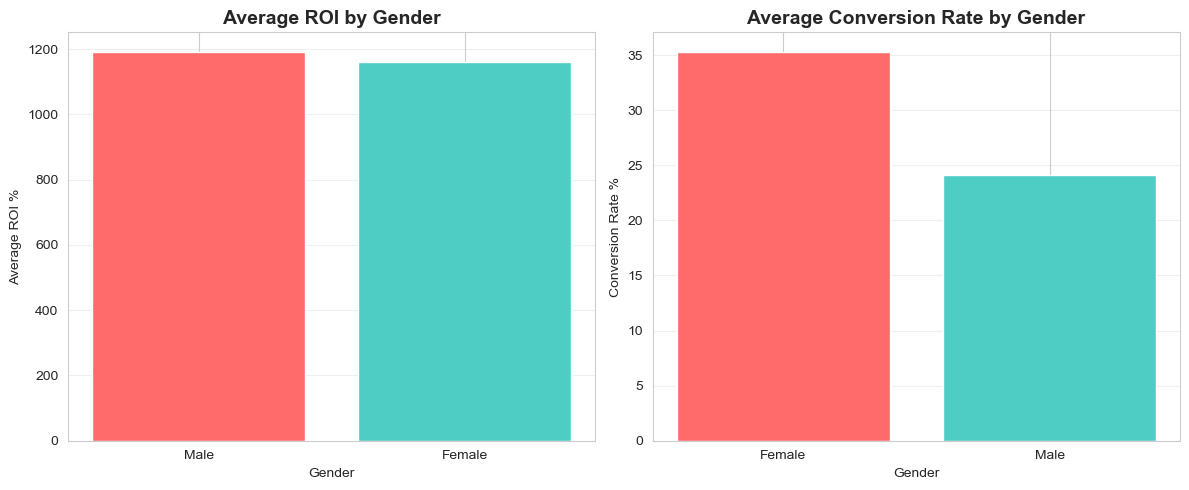

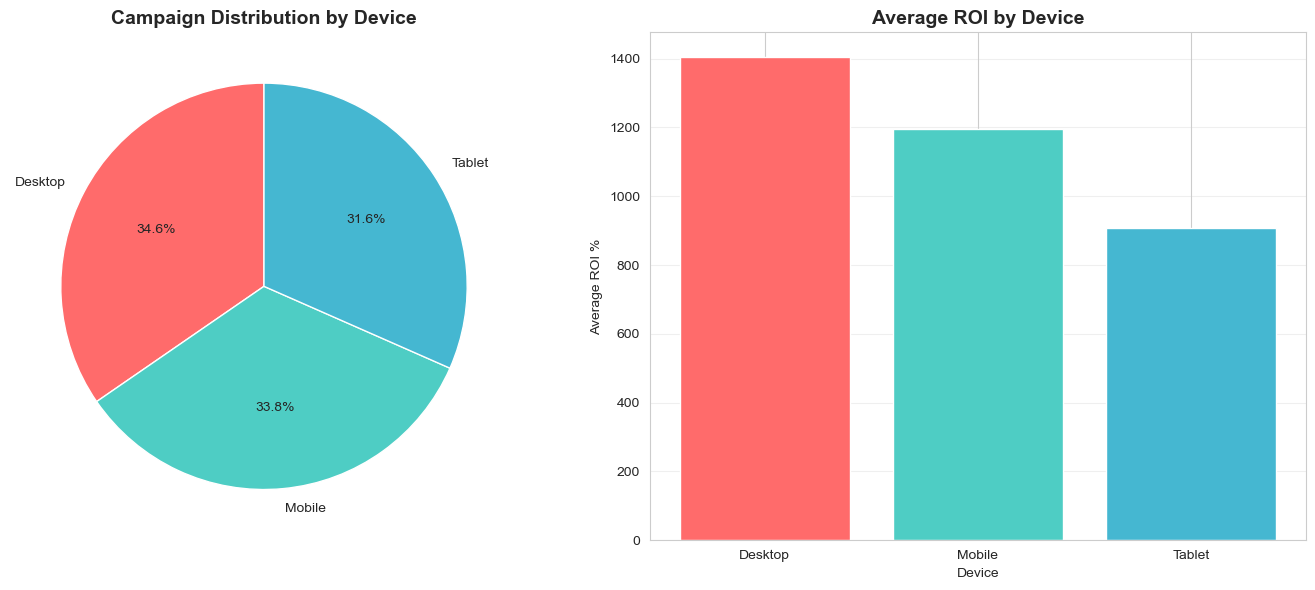


✅ All visualizations generated successfully!


In [13]:
try:
    # Color palette
    colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8']
# 💙 Subsection 3.1 – City Performance Visualization
    color = "\033[94m"; reset = "\033[0m"
    title = "Subsection 3.1 – City Performance Visualization"
    print(color + "┏" + "━"*72 + "┓")
    print("┃" + f" {title:<70}" + "┃")
    print("┗" + "━"*72 + "┛" + reset)
    print("📊 Visualization: Average ROI and Revenue by City")
    print("="*80)

    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    city_ROI = df.groupby('City')['ROI'].mean().sort_values(ascending=False)
    plt.bar(city_ROI.index, city_ROI.values, color=colors)
    plt.title('Average ROI by City', fontsize=14, fontweight='bold')
    plt.xlabel('City'); plt.ylabel('Average ROI %'); plt.xticks(rotation=45)
    plt.grid(axis='y', alpha=0.3)

    plt.subplot(1, 2, 2)
    city_revenue = df.groupby('City')['Revenue'].sum().sort_values(ascending=False)
    plt.bar(city_revenue.index, city_revenue.values/1e6, color=colors)
    plt.title('Total Revenue by City', fontsize=14, fontweight='bold')
    plt.xlabel('City'); plt.ylabel('Revenue (Million SAR)')
    plt.xticks(rotation=45); plt.grid(axis='y', alpha=0.3)
    plt.tight_layout(); plt.show(); plt.close()
# ===============================================================
# 🟠 Subsection 3.2 – Channel Performance Visualization
# ===============================================================
    color = "\033[93m"; reset = "\033[0m"
    title = "Subsection 3.2 – Channel Performance Visualization"
    print(color + "┏" + "━"*72 + "┓")
    print("┃" + f" {title:<70}" + "┃")
    print("┗" + "━"*72 + "┛" + reset)
    print("📊 Visualization: ROI and Campaign Distribution by Channel")
    print("="*80)

    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    channel_ROI = df.groupby('Channel')['ROI'].mean().sort_values(ascending=False)
    plt.bar(channel_ROI.index, channel_ROI.values, color=colors)
    plt.title('Average ROI by Channel', fontsize=14, fontweight='bold')
    plt.xlabel('Channel'); plt.ylabel('Average ROI %'); plt.grid(axis='y', alpha=0.3)

    plt.subplot(1, 2, 2)
    channel_count = df['Channel'].value_counts()
    plt.pie(channel_count.values, labels=channel_count.index, autopct='%1.1f%%',
            colors=colors, startangle=90)
    plt.title('Campaign Distribution by Channel', fontsize=14, fontweight='bold')
    plt.tight_layout(); plt.show(); plt.close()

# ===============================================================
# 💜 Subsection 3.3 – Quarterly Trends Visualization
# ===============================================================
    color = "\033[95m"; reset = "\033[0m"
    title = "Subsection 3.3 – Quarterly Trends Visualization"
    print(color + "┏" + "━"*72 + "┓")
    print("┃" + f" {title:<70}" + "┃")
    print("┗" + "━"*72 + "┛" + reset)
    print("📈 Visualization: ROI and Revenue Trends Across Quarters")
    print("="*80)

    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    quarter_ROI = df.groupby('Quarter')['ROI'].mean()
    quarters_order = ['Q1', 'Q2', 'Q3', 'Q4']
    plt.plot(quarters_order, [quarter_ROI.get(q, 0) for q in quarters_order],
             marker='o', linewidth=3, markersize=10, color='#FF6B6B')
    plt.title('Average ROI Trend by Quarter', fontsize=14, fontweight='bold')
    plt.xlabel('Quarter'); plt.ylabel('Average ROI %'); plt.grid(True, alpha=0.3)

    plt.subplot(1, 2, 2)
    quarter_revenue = df.groupby('Quarter')['Revenue'].sum()
    plt.bar(quarters_order, [quarter_revenue.get(q, 0)/1e6 for q in quarters_order],
            color=colors)
    plt.title('Total Revenue by Quarter', fontsize=14, fontweight='bold')
    plt.xlabel('Quarter'); plt.ylabel('Revenue (Million SAR)')
    plt.grid(axis='y', alpha=0.3); plt.tight_layout(); plt.show(); plt.close()

# ===============================================================
# ⚪ Subsection 3.4 – Demographics Visualization
# ===============================================================
    color = "\033[37m"; reset = "\033[0m"
    title = "Subsection 3.4 – Demographics Visualization"
    print(color + "┏" + "━"*72 + "┓")
    print("┃" + f" {title:<70}" + "┃")
    print("┗" + "━"*72 + "┛" + reset)
    print("👥 Visualization: ROI & Conversion Rate by Age, Gender, Device")
    print("="*80)

    # Age Segment
    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    age_ROI = df.groupby('Age_Segment')['ROI'].mean().sort_values(ascending=False)
    plt.bar(age_ROI.index, age_ROI.values, color=colors)
    plt.title('Average ROI by Age Segment', fontsize=14, fontweight='bold')
    plt.xlabel('Age Segment'); plt.ylabel('Average ROI %'); plt.grid(axis='y', alpha=0.3)

    plt.subplot(1, 2, 2)
    age_cvr = df.groupby('Age_Segment')['Conversion_Rate'].mean().sort_values(ascending=False)*100
    plt.bar(age_cvr.index, age_cvr.values, color=colors)
    plt.title('Average Conversion Rate by Age', fontsize=14, fontweight='bold')
    plt.xlabel('Age Segment'); plt.ylabel('Conversion Rate %'); plt.grid(axis='y', alpha=0.3)
    plt.tight_layout(); plt.show(); plt.close()

    # Gender
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    gender_ROI = df.groupby('Gender')['ROI'].mean().sort_values(ascending=False)
    plt.bar(gender_ROI.index, gender_ROI.values, color=['#FF6B6B', '#4ECDC4'])
    plt.title('Average ROI by Gender', fontsize=14, fontweight='bold')
    plt.xlabel('Gender'); plt.ylabel('Average ROI %'); plt.grid(axis='y', alpha=0.3)

    plt.subplot(1, 2, 2)
    gender_cvr = df.groupby('Gender')['Conversion_Rate'].mean().sort_values(ascending=False)*100
    plt.bar(gender_cvr.index, gender_cvr.values, color=['#FF6B6B', '#4ECDC4'])
    plt.title('Average Conversion Rate by Gender', fontsize=14, fontweight='bold')
    plt.xlabel('Gender'); plt.ylabel('Conversion Rate %'); plt.grid(axis='y', alpha=0.3)
    plt.tight_layout(); plt.show(); plt.close()

    # Device
    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    device_share = df['Device'].value_counts()
    plt.pie(device_share.values, labels=device_share.index, autopct='%1.1f%%', colors=colors, startangle=90)
    plt.title('Campaign Distribution by Device', fontsize=14, fontweight='bold')

    plt.subplot(1, 2, 2)
    device_ROI = df.groupby('Device')['ROI'].mean().sort_values(ascending=False)
    plt.bar(device_ROI.index, device_ROI.values, color=colors)
    plt.title('Average ROI by Device', fontsize=14, fontweight='bold')
    plt.xlabel('Device'); plt.ylabel('Average ROI %'); plt.grid(axis='y', alpha=0.3)
    plt.tight_layout(); plt.show(); plt.close()

    print("\n✅ All visualizations generated successfully!")

except Exception as e:
    print(f"❌ Error while generating visualizations: {str(e)}")


<div style="background-color:#DFF6E0; border-left:10px solid #4CAF50; padding:15px; border-radius:10px; font-size:32px; font-weight:bold; display:flex; align-items:center;">
  <div style="background-color:#4CAF50; color:white; border-radius:6px; width:45px; height:45px; display:flex; align-items:center; justify-content:center; margin-right:12px; font-size:24px;">
    4
  </div>
  Final Report Generation & Export
</div>


In [14]:
print("💾 Section 4: Exporting Analytical Reports to Excel")
print("="*80)

try:
    # Generate a dynamic timestamped file name
    output_file = f"Marketing_Analysis_Report_{datetime.now().strftime('%Y%m%d_%H%M%S')}.xlsx"
    
    with pd.ExcelWriter(output_file, engine='openpyxl') as writer:
        # 1. Overall Performance
        overall_performance.to_excel(writer, sheet_name='1_Overall_Performance', index=False)
        
        # 2. City Analysis
        city_analysis.to_excel(writer, sheet_name='2_City_Performance', index=False)
        
        # 3. Channel Analysis
        channel_analysis.to_excel(writer, sheet_name='3_Channel_Performance', index=False)
        
        # 4. Quarterly Analysis
        quarterly_analysis.to_excel(writer, sheet_name='4_Quarterly_Performance', index=False)
        
        # 5. Demographics (Age, Gender, Device)
        age_analysis.to_excel(writer, sheet_name='5_Age_Segments', index=False)
        gender_analysis.to_excel(writer, sheet_name='6_Gender_Segments', index=False)
        device_analysis.to_excel(writer, sheet_name='7_Device_Performance', index=False)
        
        # 6. Best & Worst Campaigns
        top5.to_excel(writer, sheet_name='8_Top5_Campaigns', index=False)
        bottom5.to_excel(writer, sheet_name='9_Bottom5_Campaigns', index=False)
        
        # 7. Top 10 Campaigns by Quarter
        for quarter in ['Q1', 'Q2', 'Q3', 'Q4']:
            quarter_data = df[df['Quarter'] == quarter]
            top_quarter = quarter_data.nlargest(10, 'ROI')[
                ['Campaign Name', 'ROI', 'Revenue', 'Spend', 'Conversion_Rate', 
                 'Channel', 'City', 'Age_Segment', 'Gender', 'Device']
            ]
            top_quarter.to_excel(writer, sheet_name=f'10_{quarter}_Top_Campaigns', index=False)
        
        # 8. Full Cleaned Dataset
        df.to_excel(writer, sheet_name='11_Full_Cleaned_Data', index=False)
    
    print(f"✅ Report exported successfully: {output_file}")
    print("="*80)
    print("🎯 The Excel report includes:")
    print("   1. Overall Performance Summary")
    print("   2. City-Level Analysis")
    print("   3. Channel Performance Analysis")
    print("   4. Quarterly Performance Insights")
    print("   5. Demographic Segmentation (Age, Gender, Device)")
    print("   6. Top and Bottom Performing Campaigns")
    print("   7. Top 10 Campaigns by Quarter")
    print("   8. Full Cleaned Dataset (All Records)")
    print("="*80)
    print("✅ All reports exported in one Excel file successfully!")

except Exception as e:
    print(f"❌ Error while exporting reports: {str(e)}")


💾 Section 4: Exporting Analytical Reports to Excel
✅ Report exported successfully: Marketing_Analysis_Report_20251116_015759.xlsx
🎯 The Excel report includes:
   1. Overall Performance Summary
   2. City-Level Analysis
   3. Channel Performance Analysis
   4. Quarterly Performance Insights
   5. Demographic Segmentation (Age, Gender, Device)
   6. Top and Bottom Performing Campaigns
   7. Top 10 Campaigns by Quarter
   8. Full Cleaned Dataset (All Records)
✅ All reports exported in one Excel file successfully!
